# <center> Escape No Game : Livrable 4

### Sommaire
<li style="font-size:20px">Emission</li>
<li style="font-size:20px">Réception</li>
<li style="font-size:20px">Conclusion</li>

## <u>1.Emission</u>

### Importer les bibliothèques python


In [31]:
import matplotlib.pyplot as plt       #Importation des librairies
import numpy as np
%matplotlib inline

### Convertion ASCII vers binaire

**On rappel la table ASCII en 8bits ci-contre :**

<img src="./27967181.webp" style="display: block;margin: 0 auto; border-radius : 5px; width: 500px"><img>

Source : https://www.commentcamarche.net/informatique/technologies/1589-code-ascii/ 

**Dans notre situation :** Rappelons que l’agent a un fichier au format “csv” qui correspond à des valeurs séparées par des virgules. De plus son fichier est composé de caractère ASCII que l’on doit convertir en binaire pour pouvoir envoyer le fichier. 

**Conversion ASCII vers binaire :**

 Le programme va tout d’abord demander de saisir le message à transmettre avec la fonction “print”. Ensuite avec la boucle “while not” va vérifier que le nombre de caractère est bien compris entre 5 et 10. On a alors bits = format(ord(char), '08b'): Cela convertit chaque caractère du message en une représentation binaire de 8 bits en utilisant la fonction ord() pour obtenir la valeur ASCII du caractère.  Puis on ajoute chaque chiffre binaire (0 ou 1) à la liste Convert en les convertissant d'abord en entiers. On obtient alors une liste 1 et 0 qui correspond au message en binaire. 
 

In [32]:
print("Donnez un message à transmettre (entre 5 et 10 caractères) :")
Message = input()

while not (5 <= len(Message) <= 10):
    print("Le message doit avoir entre 5 et 10 caractères.")
    Message = input()

Convert = []  

for char in Message:
    bits = format(ord(char), '08b') 
    Convert.extend([int(i) for i in bits])

print('Le message initial:', Message, '\nLe message binaire: ', Convert)

Donnez un message à transmettre (entre 5 et 10 caractères) :
Le message initial: 123456 
Le message binaire:  [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


### CRC

**Explication du CRC :**  

Le CRC, ou Contrôle de Redondance Cyclique, est une technique utilisée pour détecter les erreurs dans les réseaux numériques. Son objectif principal est d'assurer l'intégrité des données en empêchant les altérations accidentelles pendant la transmission. Pour ce faire, le CRC génère un code basé sur les données à transmettre, et ce code est ajouté aux données avant l'envoi. Lors de la réception, le récepteur effectue le même calcul pour vérifier si les données ont été altérées. Si une altération est détectée, une correction est appliquée pour restaurer les données à leur état original et correct. 

**Dans notre situation :** Nous utilisons la technique CRC pour corriger les erreurs après la transmission du message. 

**Comment fonctionne le CRC :** Le CRC, ou Cyclic Redundancy Check, repose sur le concept de traiter les séquences binaires comme des polynômes binaires. En d'autres termes, chaque bit dans la séquence binaire est considéré comme un coefficient de polynôme. Par exemple, la séquence binaire "0110" peut être exprimée sous la forme d'un polynôme binaire. 

Pour cela, on fait : 
###### $(0∗X^3)+(1∗X^2)+(1∗X^1)+(0∗X^0)= X2+X1$

Dans ce processus de détection d'erreur, chaque bit dans la séquence binaire est associé à un degré du polynôme. Une séquence binaire de n bits forme ainsi un polynôme de degré maximal n-1. Toutes les opérations polynomiales sont effectuées dans le cadre de l'arithmétique modulo 2. 

Dans ce mécanisme de détection d'erreur, un polynôme spécifique, appelé polynôme générateur (noté G(X)), est prédéfini et connu à la fois par l'émetteur et le récepteur. Pour détecter les erreurs, l'émetteur utilise cet algorithme pour manipuler les bits de la trame et générer un CRC (Cyclic Redundancy Check). Ce CRC, ainsi que la trame originale, sont transmis au récepteur. Celui-ci effectue le même calcul en utilisant le même polynôme générateur pour vérifier la validité du CRC et détecter d'éventuelles erreurs dans la transmission. 

In [33]:
import operator as op                                     #Importation de la librarie operator (apporter des nouvelles fonctions)
                 
key1 = [1,0,0,1,1]                                        #Déclaration du polynome générateur
key2 = [0,0,0,0,0]                                                                
                 
message = Convert                                         #Assignation de la variable Convert à message
for u in range(4):                                        #Ajout de 4 zéro à la fin de la variable message car
    message.append(0)                                      #nous utilisons un polynome générateur à cinq chiffres
resultatliste = []                                        #Déclaration de la variable resultatliste de type tableau
                                                          #Resultatliste est le reste du codage CRC
if message[0] == 1:                                 
    for x in range(5):                                                                              
        resultat = op.xor(message[x],key1[x])             #Réalisation d'une opération logique ou éxclusif
        resultatliste.append(resultat)                    #Ajout de la valeur resultat dans le tableau resultatliste
elif message[0] == 0:                                     
    for x in range(5):                                                                              
        resultat = op.xor(message[x],key2[x])             #Réalisation d'une opération logique ou éxclusif
        resultatliste.append(resultat)                    #Ajout de la valeur resultat dans le tableau resultatliste

del resultatliste[0]                                      #Suppression de la premiere valeur du tableau resultatliste
bit = resultatliste[0]                                    #Assignation a bit de la premiere valeur du tableau resultatliste
resultatliste.append(message[5])                          #Ajout de la 5éme valeur de message à resultatliste


for t in range(6,len(message)):
    if bit == 1:
        for x in range(5):
            resultat = op.xor(resultatliste[x],key1[x])   #Réalisation d'une opération logique ou éxclusif
            resultatliste.append(resultat)                #Ajout de la valeur resultat dans le tableau resultatliste
    elif bit == 0:
        for x in range(5):
            resultat = op.xor(resultatliste[x],key2[x])   #Réalisation d'une opération logique ou éxclusif
            resultatliste.append(resultat)                #Ajout de la valeur resultat dans le tableau resultatliste
    del resultatliste[0:6]                                #Suppression des sept premieres valeurs du tableau resultatliste
    bit = resultatliste[0]                                #Assignation a bit de la premiere valeur du tableau resultatliste
    resultatliste.append(message[t])                      #Ajout de la valeur message[t] à resultatliste



if bit == 1:
    for x in range(5):
        resultat = op.xor(resultatliste[x],key1[x])       #Réalisation d'une opération logique ou éxclusif
        resultatliste.append(resultat)                    #Ajout de la valeur resultat dans le tableau resultatliste
elif bit == 0:
    for x in range(5):
        resultat = op.xor(resultatliste[x],key2[x])       #Réalisation d'une opération logique ou éxclusif
        resultatliste.append(resultat)                    #Ajout de la valeur resultat dans le tableau resultatliste

del resultatliste[0:6]                                    #Suppression des sept premieres valeurs du tableau resultatliste
bit = resultatliste[0]                                    #Assignation a bit de la premiere valeur du tableau resultatliste
for z in range(4):
    del Convert[-1]                                       #On supprime les quatre dernieres valeurs de Convert
for k in range(4):
    Convert.append(resultatliste[k])                      #On ajoute à Convert resultatliste[k] quatre fois

### Codage Manchester

Le codage Manchester est une technique utilisée en communication numérique pour représenter les données binaires de manière fiable. Chaque bit de données est symbolisé par une transition de niveau au milieu de la période de bit. Une transition bas-haut représente un bit 1, et une transition haut-bas représente un bit 0. Cette méthode facilite la synchronisation entre l'émetteur et le récepteur, améliorant la fiabilité de la transmission. Bien que le codage Manchester nécessite un débit binaire plus élevé, il est largement utilisé dans les réseaux informatiques et les communications série pour assurer une transmission de données précise et synchronisée.

<img src="./386px-Manchesterencoding.png" style="display: block;margin: 0 auto; border-radius : 5px; width: 500px"><img>

In [34]:
#--------------------Création de la fonction Man---------------------------------#
def Man(para):
    manchester = []
    for i in list(para):           # Balayage de chaque élément composant le paramètre 
        if i == 0:                 # Comparaison de la valeur de i
            manchester.append(0)   # Ajoute un 0 a la suite de i
            manchester.append(1)   # Ajoute un 1 a la suite de i
        if i == 1:                 # Le 1 et le 0 sont inversés si i est égal à 1
            manchester.append(1)
            manchester.append(0)
    return manchester

Convert_Man=Man(Convert)           # Appel de la fonction et attribution de sa valeur de retour à la variable :'Convert_Man'

#-----------------Affichage du message avant et après conversion-----------------#
print('Le message binaire: ',Convert,'\n Le message binaire codé en Manchester est : ',Convert_Man)

Le message binaire:  [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] 
 Le message binaire codé en Manchester est :  [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]


### Modulation ASK

**Explication de la modulation / démodulation :** En télécommunications, le processus de transmission de l'information entre un émetteur et un récepteur nécessite l'utilisation d'un moyen de transmission tel qu'une antenne, un câble ou une fibre optique. Cependant, le signal portant l'information n'est généralement pas adapté directement au canal de communication choisi. Pour remédier à cela, on recourt à la modulation, un processus au cours duquel le signal est transformé de sa forme originale pour être mieux adapté au canal de transmission. Cette transformation implique souvent la variation des paramètres d'une onde sinusoïdale appelée porteuse, tels que son amplitude, sa phase ou sa fréquence. 

 

Le dispositif responsable de la modulation est appelé modulateur, souvent intégré dans un modem (modulateur-démodulateur). En pratique, la modulation permet d'optimiser le signal pour une transmission efficace et fiable. 

 

Pour extraire l'information du signal porteur à la réception, on utilise la démodulation. C'est le processus inverse de la modulation, permettant de récupérer le signal d'origine à partir de la porteuse modulée. Ainsi, le modem assure la conversion bidirectionnelle entre le signal d'information initial et le signal modulé adapté à la transmission, et vice versa. 

Text(0.5, 1.0, 'Modulation ASK (amplitude) du message binaire codé Manchester')

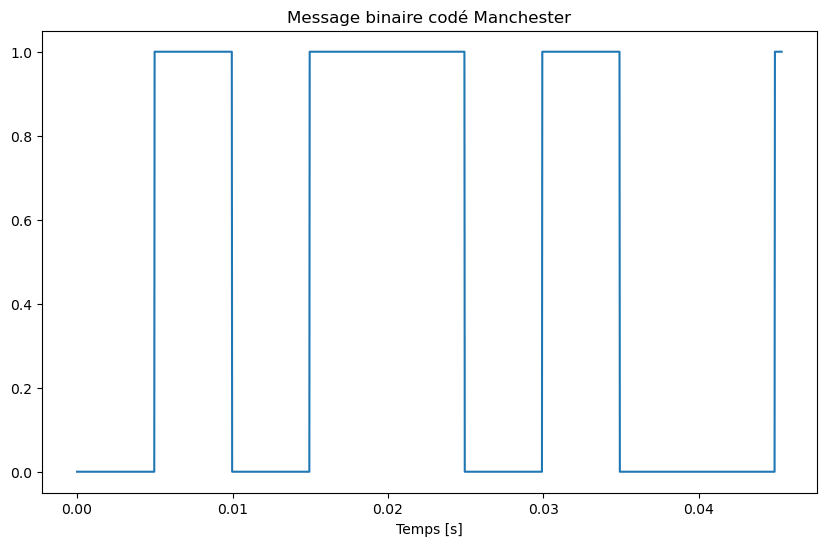

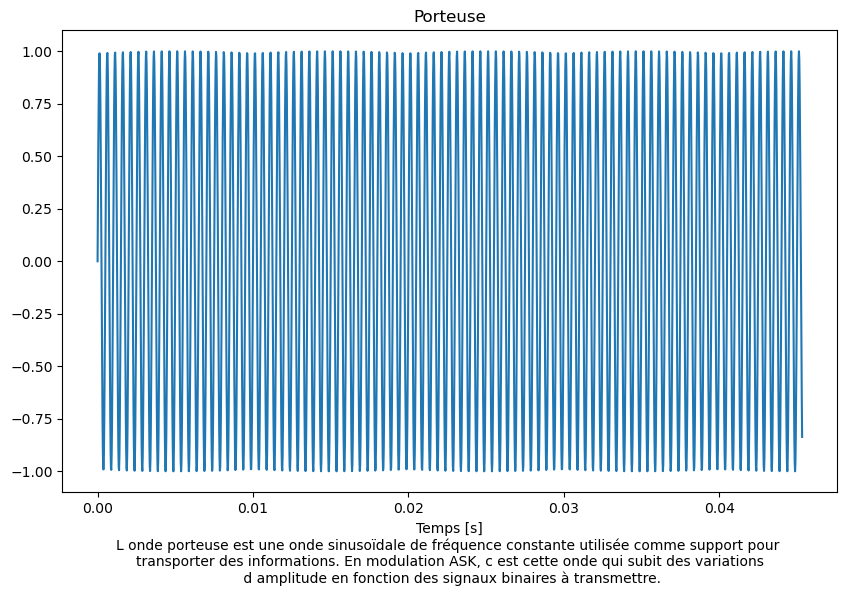

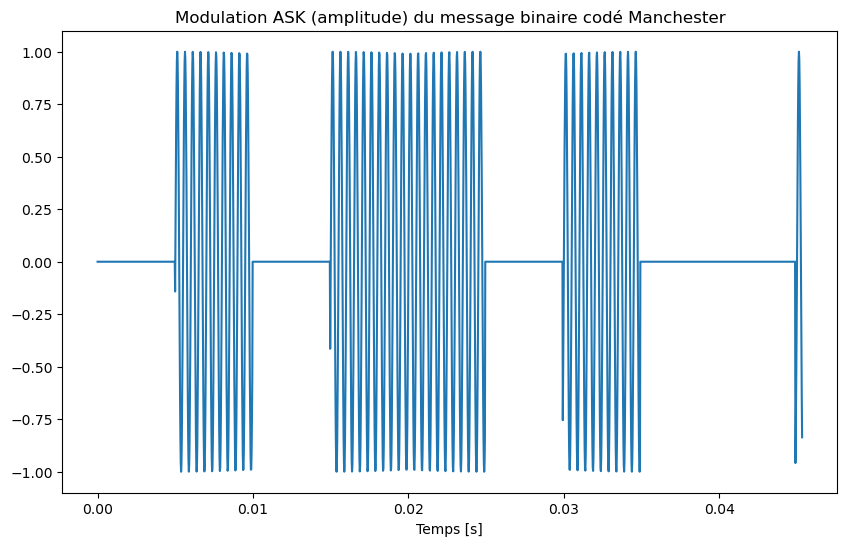

In [35]:
#-----------Initialisation des variables----------------------------#
Fe = 44100                           # Fréquence d'échantillonnage
baud = 200                           # Débit souhaité sur le canal de transmission exprimé en bit/s
Nbits = len(Convert_Man)             # Nombre de bits à transmettre
Ns = int(Fe/baud)                    # Nombre de symboles par bit (Fréq d'echan / Débit binaire)
N = int(Nbits * Ns)                  # Nombre de symboles total à envoyer (Nombre de symboles par bit * Nbr de bits)
Fp = 2000                            # Fréquence de la porteuse (2000 Hz)
#-----------Fin Initialisation des variables----------------------------#

# On duplique le message binaire initial Ns fois pour avoir un vecteur de même taille que le temps (t)
message_copie = np.repeat(Convert_Man, Ns)   
                                   
t= np.arange (0.0,N)/Fe

# On réalise la modulation en amplitude  (ASK= Amp * porteuse) 
Porteuse=np.sin(2*np.pi*Fp*t)

ASK = message_copie*Porteuse

# Enregitrer dans un ficheir CSV le résulats de la modulation ASK
np.savetxt('Message.csv', ASK, fmt='%.6f', delimiter=',')

# Nous ne représentons que les 10 premiers bits pour avoir des graphes lisibles

# Graphique 1 : Message binaire codé Manchester
plt.figure (figsize = (10,6))
plt.plot(t[0:2000],message_copie[0:2000])  # Nous ne représentons que les 1000 premiers échantillons pour mieux voir
plt.xlabel('Temps [s]')
plt.title("Message binaire codé Manchester")

# Graphique 2 : Porteuse
plt.figure (figsize = (10,6))
plt.plot(t[0:2000],Porteuse[0:2000])              # Nous ne représentons que les 1000 premiers échantillons pour mieux voir
plt.xlabel('Temps [s]')
plt.title("Porteuse")
plt.text(0.5, -0.1, "L onde porteuse est une onde sinusoïdale de fréquence constante utilisée comme support pour \ntransporter des informations. En modulation ASK, c est cette onde qui subit des variations\n d amplitude en fonction des signaux binaires à transmettre.", ha='center', va='top', transform=plt.gca().transAxes)

# Graphique 3 : Modulation ASK (amplitude) du message binaire codé Manchester
plt.figure (figsize = (10,6))
plt.plot(t[0:2000],ASK[0:2000])                   # Nous ne représentons que les 1000 premiers échantillons pour mieux voir
plt.xlabel('Temps [s]')
plt.title("Modulation ASK (amplitude) du message binaire codé Manchester")



## <u>2.Réception</u>

### Démodulation ASK

In [36]:
from numpy import genfromtxt

#Lecture Fichier CSV
ASK_Recu= genfromtxt('Message.csv')

#-----------Initialisation des variables----------------------------#
N= len(ASK_Recu)
Ns= 220
Fe = 44100
Fp= 2000
#-----------Fin Initialisation des variables----------------------------#
t= np.arange (0.0,N)/Fe;                        # temps pour un symbole
Porteuse=np.sin(2*np.pi*Fp*t)                   # Porteuse utilsiée lors de la modulation
Prod= ASK_Recu*Porteuse                         # Multiplier le signal modulé par le signal de la porteuse utilisée


# Intégration dans le résultat Démod sur période de T =[0, Ns], Ns: taille du symbole envoyé par la méthode des Trapèzes (fonction numpy.trapz en Python) (l'approche la plus simple).

y= []   # Résultat de l'intégration    

for i in range(0,N,Ns):
    y.append (np.trapz(Prod[i:i+Ns],t[i:i+Ns]))
 
# si y > 0 donc on a reçu un 1 sinon un -1
message_demodule = np.array(y) > 0   # renvoie True (si >0) ou False sinon

# Decodage du signal démodulé
message_decode= []

for ii in range (0,len(message_demodule)):
    
    if message_demodule [ii] == True:
        message_decode.extend([int(1)]) 
    else:
        message_decode.extend([int(0)]) 

### Décodage Manchester

In [37]:
#--------------------Création de la fonction Man_decode---------------------------------#
def Man_decode(message_decode):
    decod = []                                                 # Variable qui va contenir le message décodé
    for i in range(0,round(len(message_decode)/2)):             # Boucle qui va parcourir toutes les valeurs du paramètres
#--------------------Conditions qui vont recréer le message-----------------------------#         
        if (message_decode[2*i] == 0 and message_decode[2*i+1] == 1): # Fonctionnement inverse du codage Manchester
            decod.append(0)
            
        if (message_decode[2*i] == 1 and message_decode[2*i+1] == 0):
            decod.append(1) 
    return decod

message_déMan = Man_decode(message_decode)   # Appel de la fonction et attribution de sa valeur de retour à la variable :'message_déMan'

print('Le message binaire décodé en Manchester: ',message_déMan)

Le message binaire décodé en Manchester:  [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]


### CRC

In [38]:
key1 = [1,0,0,1,1]                                        #Déclaration du polynome générateur
key2 = [0,0,0,0,0]

message = message_déMan                                   #Assignation de la variable message_déMan à message
resultatliste = []                                        #Déclaration de la variable resultatliste de type tableau
resultatpartiel = []                                      #Déclaration de la variable resultatpartiel de type tableau

if message[0] == 1:
    for x in range(5):
        resultat = op.xor(message[x],key1[x])             #Réalisation d'une opération logique ou éxclusif
        resultatliste.append(resultat)                    #Ajout de la valeur resultat dans le tableau resultatliste
elif message[0] == 0:
    for x in range(5):
        resultat = op.xor(message[x],key2[x])             #Réalisation d'une opération logique ou éxclusif
        resultatliste.append(resultat)                    #Ajout de la valeur resultat dans le tableau resultatliste

del resultatliste[0]                                      #Suppression de la premiere valeur du tableau resultatliste
bit = resultatliste[0]                                    #Assignation a bit de la premiere valeur du tableau resultatliste
resultatliste.append(message[5])                          #Ajout de la 5éme valeur de message à resultatliste

for t in range(6,len(message)):
    if bit == 1:
        for x in range(5):
            resultat = op.xor(resultatliste[x],key1[x])   #Réalisation d'une opération logique ou éxclusif
            resultatliste.append(resultat)                #Ajout de la valeur resultat dans le tableau resultatliste
    elif bit == 0:
        for x in range(5):
            resultat = op.xor(resultatliste[x],key2[x])   #Réalisation d'une opération logique ou éxclusif
            resultatliste.append(resultat)                #Ajout de la valeur resultat dans le tableau resultatliste

    del resultatliste[0:6]                                #Suppression des sept premieres valeurs du tableau resultatliste
    bit = resultatliste[0]                                #Assignation a bit de la premiere valeur du tableau resultatliste
    resultatliste.append(message[t])                      #Ajout de la valeur message[t] à resultatliste


if bit == 1:
    for x in range(5):
        resultat = op.xor(resultatliste[x],key1[x])       #Réalisation d'une opération logique ou éxclusif
        resultatliste.append(resultat)                    #Ajout de la valeur resultat dans le tableau resultatliste
elif bit == 0:
    for x in range(5):
        resultat = op.xor(resultatliste[x],key2[x])       #Réalisation d'une opération logique ou éxclusif
        resultatliste.append(resultat)                    #Ajout de la valeur resultat dans le tableau resultatliste

del resultatliste[0:6]                                    #Suppression des sept premieres valeurs du tableau resultatliste
bit = resultatliste[0]                                    #Assignation a bit de la premiere valeur du tableau resultatliste

if resultatliste == [0, 0, 0, 0]:                         #Le message est correcte si il n'y a pas de reste
    print("Le message a bien été décodé")
else :
    print("Une erreur est présente dans le message")      #Si il y a un reste le message est faux
for i in range (4):
    del message[-1]                                       #Suppression des quatre dernieres valeurs de message

Le message a bien été décodé


### Conversion binaire vers ASCII:

Pour la réception du message le code est réceptionné en binaire. Il faut alors le reconvertir en message texte. Pour ce faire nous avons créé une fonction “BinaryToDecimal” ou l’on va garder une copie du code en binaire afin d’avoir une vérification par la suite que le code reçu est bien le bon code en binaire. Ensuite nous initialisons “i” pour la position dans le code binaire et “n” pour la suite du programme. Nous utilisons ensuite une boucle while permettant d’itérer sur chaque chiffre du nombre binaire jusqu’à que le nombre binaire devienne 0. Dans ce while nous définissons “dec” comme le dernier chiffre du nombre binaire. On incrémente a “decimal” la valeur de “dec” ajouter à la valeur décimale en cours (i). “binary” est divisé par lui-même afin de passer au chiffre suivant ainsi que i pour suivre l’avancer en simultané. Lorsque “binary” atteindra 0 la fonction renverra la valeur décimale calculée. Ensuite on utilisera la fonction “chr()” afin de transformer le décimal en langage ASCII. Ensuite on affiche (“print()”) “data_reçu” qui a stocké le message converti. 

In [39]:
# Fonction BinarytoDecimal() function (conversion binaire ==> décimal)
def BinaryToDecimal(binary):  
    binary1 = binary 
    decimal, i, n = 0, 0, 0                       # initialisation des variables
    
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return (decimal)

data_erreur = []                                             # Initialisation de deux tableau vide                                    
message_erreur = []

for element1 in message :                                # On met dans le premier tableau l'inverse du Convert c'est a dire que les 1 sont des 0 et inversement
    if element1 == 1:
        message_erreur.append(0)                             # Les 1 deviennent 0
    else :  
        message_erreur.append(1)                             # Les 0 deviennent 1


for element2 in message_déMan :                           # On met dans le second tableau l'inverse du message_déMan c'est a dire que les 1 sont des 0 et inversement
    if element2 == 1:
        data_erreur.append(0)                                # Les 1 deviennent 0
    else :
        data_erreur.append(1)                                # Les 0 deviennent 1
           
if message_erreur == data_erreur:                            # On va comparer les deux tableau pour voir si il y a des différences             
                                                             # Si c'est vrai alors on continue le programme et on va decoder le message
    
    bin_data = ""
    for elem in message_déMan:                            # Ecrire la suite binaire du message dans une chaine de caractères 
        bin_data += str(elem)
                                                             # initialisation d'une chaîne vide pour stocker les données reçues
    data_reçu =' '
    i=0                                                      # Découper les données binaire d'entrée et la convertir en décimal puis la convertir en chaîne par bloc de 8
    for i in range(0, len(bin_data), 8): 
                                                             # découper le bin_data de la plage d'index [0, 7] (car un caractère ASCII est codé sur 7 bits) et le stocker sous forme d'entier dans temp_data
        temp_data = int(bin_data[i+1:i+8])
          
                                                             # Passer (temp_data) dans la fonction BinarytoDecimal ()
                                                             # pour obtenir la valeur décimale correspondante de (temp_data)
        decimal_data = BinaryToDecimal(temp_data)
        """
    
        Décodage de la valeur décimale renvoyée par la Fonction BinarytoDecimal (), en utilisant chr ()
        fonction qui renvoie la chaîne correspondante de caractère pour une valeur ASCII donnée et enregistré dans data_recu
    
        """
        data_reçu = data_reçu + chr(decimal_data) 
    
    data_reçu_fin = data_reçu.replace('_',' ')
    print("\nLa transmission est correcte, et le message est :", data_reçu_fin)
else :
    print("le message est erroné")                           # Si c'est faux alors on va rechercher à quelle incice est l'erreur sur le tableau data_erreur qui correspond à l'inverse du message reçu qui est décodé

    for u in range(len(message)) :
        if message_erreur [u] != data_erreur[u] :            # Recherche de l'erreur en parcourant toute les valeurs une par une et en comparant 
            print("erreur à l'indice : " , u)
            data_erreur[u] = (data_erreur[u]+1)%2            # On inverse la valeur à la valeur fausse 
            data_fin = []
            for uu in data_erreur :                          # On va inverser toute les valeur pour retrouver notre code de base
                if uu == 1:
                    data_fin.append(0)                       # Les 1 deviennent 0
                else :
                    data_fin.append(1)                       # Les 0 deviennent 1
             
            bin_data = ""
            for elem in data_fin:                            # Ecrire la suite binaire du message dans une chaine de caractères 
                bin_data += str(elem)
                                                             # Initialisation d'une chaîne vide pour stocker les données reçues
                data_reçu =' ' 
                i=0                                          # Découper les données binaire d'entrée et la convertir en décimal puis la convertir en chaîne par bloc de 8
            for i in range(0, len(bin_data), 8): 
                                                             # Découper le bin_data de la plage d'index [0, 7] (car un caractère ASCII est codé sur 7 bits) et le stocker sous forme d'entier dans temp_data
                temp_data = int(bin_data[i+1:i+8])
                                                               
                decimal_data = BinaryToDecimal(temp_data)    # Passer (temp_data) dans la fonction BinarytoDecimal () pour obtenir la valeur décimale correspondante de (temp_data)
                """
            
                Décodage de la valeur décimale renvoyée par la Fonction BinarytoDecimal (), en utilisant chr ()
                fonction qui renvoie la chaîne correspondante de caractère pour une valeur ASCII donnée et enregistré dans data_recu
            
                """
                data_reçu = data_reçu + chr(decimal_data) 
    data_reçu_fin = data_reçu.replace('_',' ') 


La transmission est correcte, et le message est :  123456


## <u>3.conclusion<u>

Pour conclure ce projet professionnel, nous avons mis en place un système de transmission et de réception de données qui illustre les différentes étapes du processus de communication numérique. Nous avons commencé par convertir un message initial au format ASCII en binaire. Ensuite, nous avons ajouté un contrôle de redondance cyclique (CRC) pour détecter et corriger les éventuelles erreurs. Nous avons utilisé le codage Manchester pour garantir une représentation fiable des données.

Pour adapter le signal à un canal de transmission, nous avons utilisé la modulation ASK (Amplitude Shift Keying), puis nous avons appliqué la démodulation ASK lors de la réception pour extraire l'information originale. Nous avons ensuite réalisé le décodage Manchester et converti les données binaires en ASCII pour obtenir le message final.

Notre système intègre également une gestion des erreurs, ce qui permet de détecter et de corriger d'éventuelles incohérences dans le message reçu. Cette fonctionnalité renforce la fiabilité du système, assurant une transmission précise et robuste des données.